# Trabalho de IA - Relatorio
Neste notebook iremos descrever as decisões tomadas em cada submissão do trabalho, e mostrar os seus resultados.



#Submissão inicial:
Tinhamos como objetivos buscar entender os dados do dataset CIFAR 10, e predizer um conjunto de teste com uma acurácia relativamente melhorada. Inicialmente tinhamos uma acurácia de 0.1925 para melhorar este número, modificamos o conjunto de dados, apagando as colunas láterais com o objetivo de visualizar os pixels mais centralizados de cada imagem, e assim obtivemos uma acurácia de 0.2275, com isso um pouco melhor que a anterior.

Antes de optarmos por essas modificação, fizemos um teste. Fizemos um drop na ultima coluna, para assim verificamos as mudanças que eram feitas na imagem. Nesse teste obtivemos acurácia 0.19, sendo essa pior que a original.

Observação: Em ambos os testes utilizamos a mesma técnica de validação, hold-out.


`Antes da modificação`

![Antes da modificação](https://drive.google.com/uc?id=1rHHfnVqz7nY17tLoX9Vu2ZDGsYuG5SSU)

`Depois da modificação`

![Antes da modificação](https://drive.google.com/uc?id=1NUohEg6c-GB79FlGQtgxj5gAUlJdcbjB)


#Submissão preliminar

Na submissão preliminar optamos por conhecer os atributos da LogisticRegression e então manipulalos para melhorar o resultado da acurácia. Fizemos uma pesquisa na documentação do sklearn, onde encontramos a descrição de cada atributo, a partir disso optamos por modificar o atributo **C**.

Com base na documentação: **C** é um float, opcional, com padrão igual a 1.

*Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.*

Então fomos calibrando até **C** = 0.03, o primeiro teste foi sem apagar colunas, ainda usando a técnica de validação hold-out, onde manipulamos os atributos **train_size **  com valor 0.3 e **random_state** **com o valor 42**.

Segundo a documentação:

train_size: *If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.*

random_state: *If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.*

Com isso obtivemos acurácia: 0.315

Usando outra técnica de validação cross_val_score, também sem apagar colunas do conjunto de dados, com atributos da seguinte forma:

**scores = cross_val_score(pipeline, x, y, cv=5)**

Score: 0.2704

Observamos uma variação da acurácia para o socore calculado, buscamos entender qual seria o erro, mas encontramos dificuldades nesse aspecto, continuamos manipulando os atributos, tanto da regressão quanto da técnica de validação. Passamos a utilizar o cross_val_score após essas dificuldades encontradas, assim conseguimos obeservar melhor os resultados dos testes.

A partir desse ponto modificamos o conjunto de dados, apagando algumas colunas, com o drop das 3 primeiras e 3 últimas colunas obtivemos uma acurácia 0.323333 e score 0.26999

`Sem apagar as colunas`

![alt text](https://drive.google.com/uc?id=1p16fngGPIyY07G4JgqdX3HKPBlfHX0ZD)

`Apagando as colunas`

![alt text](https://drive.google.com/uc?id=1JHQCqnh_DzfDELdLGtA-5X1C0JZwhCfM)

# Submissão final

Na última submissão utlizamos as técnicas de convolução e pooling.

Baseando-se somente no score, pois a técnica utilizada é mais robusta que hold-out. Dessa forma teremos uma melhor avaliação de nossas escolhas. Começamos apenas testando a utilização da convulação e pooling com a modificação dos mesmos atributos citados na submissão anterior. 

`Teste 1 CV = 5`

![alt text](https://drive.google.com/uc?id=1aruD68EnMEnrBihQzYdLg5lCO_kwwJ9E)

`Teste 2 CV = 12`

![alt text](https://drive.google.com/uc?id=19Paxe4RZkIXtgH9rSoiUHYKgV-neZiTA)

Agora teste realizados modificando os filtros. 

`Teste 1 `

**Filtro detecta bordas** 

![alt text](https://drive.google.com/uc?id=1Hd6-gOOiCZFFIF1nAbsRjB_9-Qwll2tQ)  
![alt text](https://drive.google.com/uc?id=1A2bJwUQArd9L-l7AxUFx95KGX0UiHujV)  

`Teste 2`

**Filtro aguçar**

![alt text](https://drive.google.com/uc?id=13HDLG_LfJUzx8wRSsJmYqom73PS2HzdI)  
![alt text](https://drive.google.com/uc?id=1e77jbWkx3EzUoxpJ17KEXa5gYzWvWEM9)

`Teste 3`

**Filtro desfoque**

![alt text](https://drive.google.com/uc?id=1Q3ju6CI6fAgKXFkkQRlwgUMeJ1CkDbxm)  
![alt text](https://drive.google.com/uc?id=1Gdf176nhMANiDtpNjJ0nkVTIC7ALabMK)

`Teste 4` 

**Filtro realça bordas** 

![alt text](https://drive.google.com/uc?id=1rBl1oWjTXdVzra7fog7WTsqGvC3F-uBs)  
![alt text](https://drive.google.com/uc?id=1HQZ_aI4FZp5QyCdAkP74n6eNjBU4lhxt)

`Teste 5` 

**Filtro destaca relevo** 

![alt text](https://drive.google.com/uc?id=1HGLdv3eRukP1XNZTGAkl9_6k4PQy9DaR)  
![alt text](https://drive.google.com/uc?id=1zTwgnJK0Ovi6vTPXla9sHYeEwU5kvUAc)

A partir de alguns testes feitos, sendo esses manipulando os atributos da convolução, pooling e aplicando novos filtros, observamos que os melhores resultados foram obtidos usando size 6 e stride 3. Testamos algumas variações nos atributos citados, mas tivemos diferença entre 0.1 e 0.3, ou seja, o score estava em torno de 0.28 a 0.30 com a mudança nos valores dos atributos. Concluindo, o melhor o resultado foi obtido ao utilizar o filtro que destaca o relevo. Em todos os testes efetuados mudamos os atributos, da **LogisticRegression**, **cross_val_score**, **pooling e convolução**, a seguir apresentamos o exemplo onde obtivemos melhor resultado, até a data proposta.


In [0]:
import random
import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


class IdentityNormalize(colors.Normalize):
  '''
  Classe para desligar normalização de cores ao exibir filtros.
  Isto permite diferenciar alguns filtros.
  '''
  def __call__(self, value, clip=None):
      return value

id_norm = IdentityNormalize()

# Submissão final


## CIFAR10
Agora,
obteremos os dados do trabalho 
  e aplicaremos convolução e pooling para extrair novos atributos.

São disponibilizados dois conjuntos de dados:
- [treino](https://github.com/eraldoluis/cifar10-datasets/raw/master/cifar10-train.csv.zip) - Este conjunto deve ser usado para treinamento e seleção de modelos.
- [teste](https://github.com/eraldoluis/cifar10-datasets/raw/master/cifar10-test.csv.zip) - Este conjunto não possui a variável a ser predita, ou seja, contém apenas os atributos de entrada.
Cada grupo deve usar seu melhor modelo para predizer as classes dos exemplos neste conjunto.
Então,
as classes preditas devem ser entregues no final do trabalho.

A acurácia obtida por cada grupo no conjunto de teste será usada para calcular uma parte da nota do trabalho,
  como especificado abaixo.

### Lista de Classes
Abaixo criamos uma tupla com as classes do problema.
A ordem das classes está de acordo com os IDs disponíveis nos conjuntos de dados.
Isto é,
a posição da classe na tupla corresponde ao ID da classe.
Portanto,
esta tupla `CLASSES` pode ser usada para converter um ID
  (número inteiro entre 0 e 9)
  para o nome da classe.

In [0]:
CLASSES = ("airplane", "automobile", "bird", "cat", "deer", 
           "dog", "frog", "horse", "ship", "truck")

### Obtendo Conjunto de Treino
O conjunto de trieno contém 2 mil imagens.
O conjunto de treino pode ser baixado pelo link fornecido acima.
Entretanto, 
em princípio,
  não é necessário salvar este arquivo na sua máquina local.
O pandas permite a criação de um DataFrame 
  diretamente a partir de um link.

Observe que a primeira coluna corresponde à classe (rótulo) do exemplo
  e as colunas seguintes são os valores de cada um dos 1024 pixels (32 * 32).
As colunas dos pixels estão nomeadas como `p_lin_col`,
  sendo que `lin` corresponde à linha da imagem
  e `col` à coluna.

In [0]:
df_train = pd.read_csv("https://github.com/eraldoluis/cifar10-datasets/raw/master/cifar10-train.csv.zip")
df_train.head()

,label,p_00_00,p_00_01,p_00_02,p_00_03,p_00_04,p_00_05,p_00_06,p_00_07,p_00_08,p_00_09,p_00_10,p_00_11,p_00_12,p_00_13,p_00_14,p_00_15,p_00_16,p_00_17,p_00_18,p_00_19,p_00_20,p_00_21,p_00_22,p_00_23,p_00_24,p_00_25,p_00_26,p_00_27,p_00_28,p_00_29,p_00_30,p_00_31,p_01_00,p_01_01,p_01_02,p_01_03,p_01_04,p_01_05,p_01_06,...,p_30_24,p_30_25,p_30_26,p_30_27,p_30_28,p_30_29,p_30_30,p_30_31,p_31_00,p_31_01,p_31_02,p_31_03,p_31_04,p_31_05,p_31_06,p_31_07,p_31_08,p_31_09,p_31_10,p_31_11,p_31_12,p_31_13,p_31_14,p_31_15,p_31_16,p_31_17,p_31_18,p_31_19,p_31_20,p_31_21,p_31_22,p_31_23,p_31_24,p_31_25,p_31_26,p_31_27,p_31_28,p_31_29,p_31_30,p_31_31
0,6,61.0,45.0,48.0,56.0,77.0,95.0,111.0,115.0,122.0,124.0,107.0,103.0,119.0,117.0,110.0,102.0,111.0,110.0,100.0,116.0,115.0,108.0,109.0,112.0,125.0,136.0,141.0,133.0,134.0,136.0,129.0,128.0,19.0,0.0,10.0,31.0,57.0,87.0,94.0,...,87.0,72.0,35.0,11.0,99.0,152.0,67.0,58.0,149.0,135.0,146.0,151.0,168.0,187.0,188.0,179.0,163.0,145.0,136.0,133.0,132.0,129.0,120.0,126.0,130.0,121.0,110.0,111.0,114.0,103.0,92.0,95.0,101.0,92.0,71.0,82.0,144.0,188.0,123.0,97.0
1,9,173.0,135.0,104.0,101.0,130.0,165.0,188.0,196.0,153.0,117.0,106.0,105.0,121.0,128.0,187.0,224.0,211.0,166.0,164.0,159.0,116.0,100.0,94.0,88.0,70.0,60.0,57.0,77.0,95.0,92.0,88.0,80.0,156.0,151.0,124.0,128.0,160.0,162.0,186.0,...,14.0,64.0,50.0,50.0,74.0,95.0,116.0,124.0,149.0,148.0,156.0,136.0,34.0,11.0,16.0,69.0,127.0,112.0,103.0,94.0,63.0,30.0,20.0,19.0,33.0,36.0,20.0,6.0,6.0,9.0,23.0,46.0,65.0,91.0,114.0,129.0,133.0,136.0,136.0,136.0
2,9,255.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,252.0,253.0,243.0,224.0,242.0,237.0,247.0,252.0,253.0,252.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,74.0,64.0,65.0,73.0,75.0,73.0,75.0,83.0,111.0,104.0,100.0,94.0,90.0,87.0,87.0,90.0,92.0,94.0,89.0,90.0,87.0,86.0,89.0,91.0,92.0,91.0,89.0,87.0,83.0,75.0,75.0,80.0,77.0,66.0,63.0,69.0,77.0,83.0,84.0,85.0
3,4,25.0,34.0,35.0,37.0,39.0,37.0,37.0,22.0,26.0,30.0,21.0,29.0,37.0,48.0,63.0,46.0,36.0,36.0,30.0,31.0,35.0,40.0,51.0,73.0,49.0,42.0,56.0,52.0,41.0,67.0,72.0,76.0,28.0,30.0,27.0,33.0,29.0,33.0,34.0,...,100.0,97.0,100.0,96.0,87.0,74.0,70.0,76.0,80.0,77.0,77.0,86.0,86.0,84.0,86.0,71.0,69.0,79.0,86.0,88.0,86.0,85.0,89.0,101.0,90.0,87.0,87.0,102.0,87.0,97.0,81.0,64.0,80.0,67.0,76.0,75.0,58.0,47.0,56.0,65.0
4,1,179.0,177.0,185.0,192.0,194.0,193.0,194.0,193.0,192.0,191.0,194.0,194.0,194.0,192.0,191.0,187.0,187.0,188.0,188.0,187.0,186.0,187.0,185.0,184.0,184.0,183.0,181.0,178.0,178.0,178.0,176.0,175.0,179.0,183.0,182.0,177.0,187.0,192.0,192.0,...,74.0,74.0,71.0,69.0,75.0,79.0,74.0,74.0,74.0,75.0,74.0,75.0,82.0,84.0,85.0,90.0,88.0,90.0,88.0,92.0,91.0,93.0,95.0,96.0,97.0,98.0,96.0,97.0,94.0,92.0,88.0,85.0,82.0,79.0,79.0,75.0,74.0,78.0,74.0,76.0


### Criando Exemplos como Matrizes 32x32
Vamos convertes os exemplos em matrizes de 32x32 pixels
  para facilitar o processamento com os filtros.

In [0]:
x = np.array(df_train.drop(columns=["label"])).reshape(-1, 32, 32)
y = np.array(df_train["label"])
print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: (2000, 32, 32)
y.shape: (2000,)


### Visualizando um Exemplo
Abaixo visualizamos um exemplo escolhido aleatoriamente
  juntamente com sua classe.
Incluímos um *slide* onde o usuário pode selecionar outra imagem para ser exibida.
Esta funcionalidade é criada usando-se a função `interact(...)` dos notebooks.

In [0]:
def plot_exemplo(idx_ex):
  # Imagem do exemplo.
  x_ex = x[idx_ex]
  # Classe do exemplo (ID).
  y_ex = y[idx_ex]

  # Exibe imagem.
  plt.figure(figsize=(2, 2))
  plt.imshow(x_ex, cmap=plt.cm.gray)
  plt.axis('off')
  plt.title(f"Classe: {CLASSES[y_ex]}")
  plt.show()


# Seleciona um índice aleatoriamente.
idx_ex = np.random.choice(x.shape[0])

interact(plot_exemplo, idx_ex=IntSlider(value=idx_ex, min=0, max=x.shape[0]))

interactive(children=(IntSlider(value=1373, description='idx_ex', max=2000), Output()), _dom_classes=('widget-…

<function __main__.plot_exemplo>

## Filtros de Convolução
Como vimos acima,
um filtro de convolução é representado por uma pequena matriz,
  em geral, quadrada (mesmo número de linhas e colunas).
Abaixo, definimos um filtro 7x7.
Logo em seguida exibimos este filtro.
Observe que podemos usar, inclusive, valores negativos em um filtro.

In [0]:
#filtro = np.array([[-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
#                   [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
#                   [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
#                   [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
#                   [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
#                   [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
#                   [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1]])

# REALÇA BORDAS SCORE: 0.310
#filtro = np.array([[0.0,  0.0,  0.0],
 #                  [-1.,  1.,  0.0],
 #                [0.0,  0.0,  0.0]])

# DESTACA RELEVO OBS: MELHOR TESTE ATÉ O MOMENTO SCORE: 0.316
# SIZE:6 STRIDE: 3
filtro = np.array([[-2.,  -1.,  0.0],
                   [-1.,  1.,  1.],
                   [0.0,  1.,  2.]])

# AGUÇAR SCORE: 0.3014
#filtro = np.array([[0.0,  -1.,  0.0],
#                    [-1.,  5.,  -1.],
#                    [0.0,  -1.,  0.0]])

# DETECTA BORDAS SCORE: 0.3010
#filtro = np.array([[0.0,  1.,  0.0],
#                     [1.,  -4.,  1.],
#                     [0.0,  1.,  0.0]])

# DESFOQUE SCORE: 0.3055
#filtro = np.array([[1,  1., 1.],
#                    [1., 1., 1.],
#                    [1., 1., 1.]])


### Visualizando Filtro

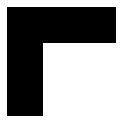

In [0]:
def exibe_filtro(filtro):
  plt.figure(figsize=(2, 2))
  plt.imshow(filtro, cmap=plt.cm.gray, norm=id_norm)
  plt.axis('off')
  plt.show()

exibe_filtro(filtro)

### Outro filtro
Abaixo definimos outro filtro.

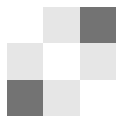

In [0]:
filtro2 = np.zeros(shape=(3,3))

for row in range(filtro2.shape[0]):
  for col in range(filtro2.shape[1]):
    filtro2[row,col] = 0.9 / abs(row - col) if abs(row - col) > 0 else 1.0

exibe_filtro(filtro2)

### Banco de filtros
Nas células a seguir,
definiremos funções que aplicam um banco de filtros
  a uma base de imagens.
Vamos usar os dois filtros acima como banco de filtros
  e representaremos o banco como uma lista de filtros.
Observe que todos os filtros do banco devem ter a mesma dimensão
  (mesmo número de linhas e colunas).

In [0]:
filtros = [filtro, filtro2]

### Convolução e Pooling
As funções abaixo aplicam um filtro de convolução 
  em várias imagens ao mesmo tempo.
Isto é alcançado usando a funcionalidade de *broadcasting* do numpy.
Desta forma,
as operações são realizadas em palelo em várias imagens
  e isto é muito mais eficiente.

A função `imgs_conv_multi(imgs, filtros, stride=1)` aplica uma lista de filtros `filtros` nas imagens `imgs`.
Todos os filtros devem ter o mesmo tamanho
  (mesmo número de linhas e colunas).

In [0]:
def imgs_conv(imgs, filtro, stride=1):
  '''
  Aplica o filtro 'filtro' nas imagens 'imgs' usando o stride dado.

  img.shape -> (num_imagens, num_rows, num_cols)
  '''
  # Tamanho do filtro.
  f_rows = filtro.shape[0]
  f_cols = filtro.shape[1]

  # Tamanho da imagem resultante.
  num_imgs = imgs.shape[0]
  num_rows = ((imgs.shape[1] - f_rows) // stride) + 1
  num_cols = ((imgs.shape[2] - f_cols) // stride) + 1

  # Resultado da convolução.
  res = np.zeros((num_imgs, num_rows, num_cols))

  # Aplica filtro em cada posição da imagem.
  for row in range(num_rows):
    for col in range(num_cols):
      r = row*stride
      c = col*stride
      res[:,row,col] = np.multiply(filtro, imgs[:,r:r+f_rows,c:c+f_cols]).sum(axis=(1,2))
  
  return res

def imgs_conv_multi(imgs, filtros, stride=1):
  '''
  Aplica uma lista de filtros nas imagens dadas.
  '''
  res = []
  for filtro in filtros:
    res.append(imgs_conv(imgs, filtro, stride))
  return np.stack(res).mean(axis=0)

def imgs_pool(imgs, size=8, stride=8):
  '''
  Aplica mean-pooling nas imagens dadas usadas o tamanho (size) e o stride dados.
  '''
  # Tamanho da imagem resultante.
  num_imgs = imgs.shape[0]
  num_rows = ((imgs.shape[1] - size) // stride) + 1
  num_cols = ((imgs.shape[2] - size) // stride) + 1

  # Resultado do pooling.
  res = np.zeros((num_imgs, num_rows, num_cols))

  # Aplica filtro em cada posição da imagem.
  for row in range(num_rows):
    for col in range(num_cols):
      r = row*stride
      c = col*stride
      res[:,row,col] = imgs[:,r:r+size,c:c+size].mean(axis=(1,2))
  
  return res

### Visualizando Convolução de Filtros em uma Imagem
Abaixo apresentamos uma visualização do resultado da convolução dos dois filtros definidos acima,
  combinados a uma operação de pooling.
Novamente,
usamos a função `interact(...)` para permitir a seleção
  da imagem,
  do tamanho do pooling
  e do stride do pooling.

In [0]:
def plot_filtros_imagem(idx_ex, filtros, pool_size, pool_stride):
  # Obtém uma matriz contendo apenas a imagem selecionada.
  x_res = x[idx_ex:idx_ex+1]

  # Aplica convolução.
  x_conv = imgs_conv_multi(x_res, filtros)

  # Aplica pooling.
  x_pool = imgs_pool(x_conv, size=pool_size, stride=pool_stride)

  # Cria array de imagens com duas linhas e uma coluna para cada filtro.
  max_cols = max(3, len(filtros))
  fig, axs = plt.subplots(2, max_cols, figsize=(2*max_cols, 4))

  # Exibe filtros na primeira linha da imagem.
  for idx, filtro in enumerate(filtros):
    axs[0][idx].imshow(filtro, cmap=plt.cm.gray, norm=id_norm)
    axs[0][idx].set_title(f"Filtro {idx}: {filtro.shape}")
    axs[0][idx].axis('off')
  
  # Preenche imagens vazias.
  for idx in range(3 - len(filtros)):
    axs[0][2 + idx].axis('off')
  for idx in range(len(filtros) - 3):
    axs[1][len(filtros) - 1 + idx].axis('off')

  # Exibe imagem.
  axs[1][0].imshow(x_res[0], cmap=plt.cm.gray)
  axs[1][0].set_title(f"Classe: {CLASSES[y[idx_ex]]}")
  axs[1][0].axis('off')

  # Exibe resultado da convolução.
  axs[1][1].imshow(x_conv[0], cmap=plt.cm.gray)
  axs[1][1].set_title(f"Conv: {x_conv[0].shape}")
  axs[1][1].axis('off')

  # Exibe resultado do pooling.
  axs[1][2].imshow(x_pool[0], cmap=plt.cm.gray)
  axs[1][2].set_title(f"Pooling: {x_pool[0].shape}")
  axs[1][2].axis('off')

  plt.show()


num_imgs = x.shape[0]

interact(plot_filtros_imagem, 
         idx_ex=IntSlider(value=random.randrange(num_imgs), min=0, max=num_imgs),
         filtros=fixed(filtros),
         pool_size=IntSlider(value=6, min=1, max=32), 
         pool_stride=IntSlider(value=3, min=1, max=16))

interactive(children=(IntSlider(value=99, description='idx_ex', max=2000), IntSlider(value=6, description='poo…

<function __main__.plot_filtros_imagem>

## Transformando Dataset
Abaixo,
aplicamos as operações de convolução e pooling no dataset do CIFAR10.

In [0]:
# Aplica convolução.
x_conv = imgs_conv_multi(x, filtros)

# Aplica pooling.
x_pool = imgs_pool(x_conv, size=6, stride=3)

# Volta para o shape com dois axis.
x_res = x_pool.reshape((x_pool.shape[0], -1))

print(x.shape)
print(x_res.shape)

(2000, 32, 32)
(2000, 81)


## Treinando e Avaliando um Classificador
Agora vamos treinar um regressor logístico
  usando os hiper-parâmetros padrão.
Vamos utilizar hold-out para fazer a validação do modelo.

### Treinamento com Normalização de Atributos
Abaixo,
treinamos um regressor logístico e, antes, 
  aplicamos a normalização min-max.
O processo de treinamento demora alguns minutos.

In [0]:
# Normalização de atributos min-max.
scaler = MinMaxScaler()
# scaler = StandardScaler()

# Atributos polinomiais de grau 2.
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Regressor logístico.
clf = LogisticRegression(penalty="none", C=0.005)

# Cria um pipeline.
pipeline = Pipeline([("scaler", scaler),
                     ("poly", poly),
                     ("clf", clf)])

# Validação hold-out.
x_train, x_val, y_train, y_val = train_test_split(x_res, y, test_size=0.1, random_state=42)

#validação melhorada
scores = cross_val_score(pipeline, x_res, y, cv=12)

print(scores)

media = sum(scores) / len(scores)

print("Score: ", media)

# Treina modelo.
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sk

[0.2754491  0.31137725 0.29341317 0.35928144 0.32335329 0.2994012
 0.34131737 0.34131737 0.30722892 0.34939759 0.3373494  0.25903614]
Score:  0.3164935189861241


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('clf',
                 LogisticRegression(C=0.005, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### Avalia Modelo
Abaixo realizamos a avaliação do modelo usando *acurácia*.
Observe que usamos o objeto pipeline para fazer a predição
  no conjunto de validação (`x_val`).
Isto é muito importante pois este objeto
  inclui a normalização dos atributos
  de acordo com os parâmetros do conjunto de treinamento
  (valores mínimos e máximos dos atributos).
Como os atributos do conjunto de treino foram normalizados,
  antes de aplicar o modelo no conjunto de validação,
  é necessário aplicar a mesma normalização.
O objeto `MinMaxScaler`, gerenciado pelo objeto `Pipeline`,
  armazena os dados da normalização 
  (valores min e max para cada atributo)
  e cuida de fazer esta normalização.

In [0]:
y_pred = pipeline.predict(x_val)
print("Acurácia:", accuracy_score(y_val, y_pred))

Acurácia: 0.365


## Submissão dos Resultados
Para submeter os resultados de um modelo,
  devemos calcular as predições deste modelo 
  no conjunto de teste.
O conjunto de teste está disponível no link fornecido no início deste notebook.
Assim como no caso do conjunto de treino,
  não precisamos fazer o download deste arquivo,
  pois podemos usar o pandas para criar um DataFrame
  diretamente a partir do link.

### Obtendo Dados de Teste
Como mencionado anteriormente,
os dados de teste não incluem os rótulos (classes) de cada exemplo.

In [0]:
df_test = pd.read_csv("https://github.com/eraldoluis/cifar10-datasets/raw/master/cifar10-test.csv.zip")
df_test.head()

,p_00_00,p_00_01,p_00_02,p_00_03,p_00_04,p_00_05,p_00_06,p_00_07,p_00_08,p_00_09,p_00_10,p_00_11,p_00_12,p_00_13,p_00_14,p_00_15,p_00_16,p_00_17,p_00_18,p_00_19,p_00_20,p_00_21,p_00_22,p_00_23,p_00_24,p_00_25,p_00_26,p_00_27,p_00_28,p_00_29,p_00_30,p_00_31,p_01_00,p_01_01,p_01_02,p_01_03,p_01_04,p_01_05,p_01_06,p_01_07,...,p_30_24,p_30_25,p_30_26,p_30_27,p_30_28,p_30_29,p_30_30,p_30_31,p_31_00,p_31_01,p_31_02,p_31_03,p_31_04,p_31_05,p_31_06,p_31_07,p_31_08,p_31_09,p_31_10,p_31_11,p_31_12,p_31_13,p_31_14,p_31_15,p_31_16,p_31_17,p_31_18,p_31_19,p_31_20,p_31_21,p_31_22,p_31_23,p_31_24,p_31_25,p_31_26,p_31_27,p_31_28,p_31_29,p_31_30,p_31_31
0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,186.0,187.0,187.0,187.0,186.0,186.0,186.0,186.0,186.0,186.0,186.0,185.0,185.0,185.0,185.0,185.0,185.0,184.0,184.0,184.0,184.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,...,193.0,193.0,192.0,192.0,193.0,192.0,191.0,192.0,194.0,194.0,195.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,192.0,192.0,193.0,192.0,192.0,192.0
1,181.0,179.0,176.0,173.0,170.0,167.0,167.0,168.0,168.0,168.0,167.0,165.0,162.0,159.0,154.0,150.0,150.0,154.0,141.0,108.0,102.0,123.0,143.0,137.0,134.0,132.0,134.0,135.0,131.0,134.0,128.0,129.0,175.0,175.0,175.0,176.0,176.0,176.0,173.0,172.0,...,91.0,65.0,76.0,67.0,29.0,41.0,107.0,97.0,146.0,154.0,140.0,144.0,150.0,144.0,137.0,149.0,157.0,152.0,147.0,145.0,142.0,124.0,51.0,51.0,107.0,106.0,111.0,93.0,37.0,29.0,32.0,101.0,131.0,74.0,67.0,79.0,39.0,45.0,110.0,97.0
2,183.0,179.0,180.0,184.0,192.0,203.0,209.0,213.0,215.0,220.0,227.0,222.0,209.0,199.0,194.0,192.0,192.0,202.0,218.0,235.0,234.0,227.0,232.0,239.0,234.0,234.0,228.0,207.0,198.0,190.0,185.0,191.0,184.0,191.0,201.0,215.0,221.0,219.0,219.0,225.0,...,171.0,201.0,219.0,234.0,237.0,234.0,227.0,229.0,243.0,237.0,236.0,235.0,233.0,230.0,228.0,224.0,216.0,200.0,157.0,170.0,215.0,236.0,239.0,242.0,243.0,240.0,237.0,238.0,240.0,198.0,110.0,110.0,187.0,213.0,220.0,232.0,237.0,227.0,223.0,230.0
3,133.0,137.0,131.0,119.0,121.0,118.0,132.0,142.0,143.0,133.0,134.0,144.0,148.0,142.0,131.0,137.0,145.0,148.0,138.0,129.0,126.0,119.0,139.0,143.0,148.0,91.0,3.0,3.0,2.0,39.0,106.0,120.0,128.0,137.0,142.0,140.0,131.0,140.0,148.0,143.0,...,163.0,164.0,134.0,151.0,150.0,128.0,151.0,144.0,112.0,136.0,162.0,143.0,141.0,153.0,141.0,141.0,155.0,142.0,127.0,156.0,158.0,137.0,146.0,162.0,163.0,148.0,142.0,159.0,158.0,150.0,115.0,146.0,176.0,148.0,143.0,163.0,134.0,138.0,162.0,137.0
4,165.0,157.0,146.0,129.0,140.0,159.0,154.0,150.0,170.0,192.0,185.0,180.0,177.0,184.0,172.0,206.0,214.0,199.0,209.0,209.0,186.0,184.0,209.0,215.0,221.0,158.0,156.0,214.0,201.0,193.0,190.0,188.0,197.0,180.0,145.0,136.0,147.0,187.0,193.0,158.0,...,162.0,167.0,141.0,120.0,111.0,124.0,121.0,135.0,128.0,124.0,161.0,206.0,208.0,177.0,157.0,140.0,147.0,144.0,157.0,178.0,176.0,158.0,185.0,175.0,174.0,167.0,161.0,161.0,168.0,158.0,144.0,126.0,143.0,168.0,149.0,118.0,114.0,134.0,130.0,122.0


### Transformando Dados de Teste
É preciso aplicar a convolução e o pooling exatamente como foram aplicados nos dados de treino antes de usar o modelo.

In [0]:
# Transforma em array e no formato 32x32.
x_test = np.array(df_test).reshape((-1,32,32))

# Aplica convolução.
x_test_conv = imgs_conv_multi(x_test, filtros)

# Aplica pooling.
x_test_pool = imgs_pool(x_test_conv, size=6, stride=3)

# Volta para o shape com dois axis.
x_test_res = x_test_pool.reshape((x_test_pool.shape[0], -1))

print(x_test_res.shape)

(2000, 81)


### Predição do Modelo
Aplicamos agora o nosso modelo nos dados do teste.
Novamente,
utilizamos o objeto `Pipeline` para fazer esta predição pois,
  assim como na validação,
  precisamos normalizar os atributos do teste de acordo com os valores
  min e max do treino.

In [0]:
y_pred = pipeline.predict(x_test_res)

### Gerando Arquivo com Predições
O arquivo de predições a ser submetido é bem simples:
  cada linha deve conter a classe predita 
  para um exemplo do conjunto de teste.
A ordem das predições deve seguir a mesma ordem 
  que os exemplos aparecem no arquivo de teste.
O código abaixo gera este arquivo 
  usando a predição do modelo acima.

In [0]:
df_pred = pd.DataFrame(y_pred, columns=["label"])
df_pred.to_csv("cifar10-testSubmissaoFinal-predicoes.csv", index=False)
df_pred.head()

,label
0,0
1,3
2,6
3,6
4,7


### Download das Predições
O código abaixo gera um download automático
  do arquivo gerado acima.
Talvez você tenha que autorizar este download no seu navegador.
Este arquivo fica salvo (temporariamente)
  no sistema de arquivos da engine do notebook.
Você pode acessar este arquivo 
  na aba do lado esquerdo deste notebook
  (ao lado esquerdo da tabela de conteúdo)
  clicando em um ícone de "pastinha".

In [0]:
from google.colab import files
files.download("cifar10-testSubmissaoFinal-predicoes.csv")

MessageError: ignored

## Treinamento do Modelo Final
Em geral,
o desempenho de um modelo de AM aumenta 
  a medida que a quantidade de exemplos de treino aumenta.
Desta forma,
o ideal para alcançar o melhor desempenho
  é treinar um novo modelo
  em todo o conjunto de treino,
  usando os melhores valores dos hiper-parâmetros 
  encontrados na validação cruzada.
Você pode usar esta ideia 
  para submeter predições para o conjunto de teste.